   ### HR Data Analytics
   problem statement:The HR in a company needs to identify which all employees get promoted
   
   Evaluation metric : f1_score

In [1]:
#to avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt #forplotting graphs

In [3]:
test =  pd.read_csv('/home/student/Downloads/MLproject/test_2umaH9m.csv')
train = pd.read_csv('/home/student/Downloads/MLproject/train_LZdllcl.csv')

In [4]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
#Checking the shape of data
test.shape

(23490, 13)

In [6]:
train.shape

(54808, 14)

In [7]:
#Adding the type to identify the type of data
train['type']='Train'

In [8]:
test['type']='Test'

In [9]:
#joining the test and train
data= pd.concat([train,test])
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,type
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,Train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,Train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,Train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,Train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,Train


In [10]:
data_bk2 = data.copy()

In [11]:
#Dropping some unwanted columns in the dataset and it is stored in databk3
databk3 = data.drop(['region','recruitment_channel','no_of_trainings'],axis=1)

In [12]:
data = databk3.copy()

In [13]:
data.shape

(78298, 12)

Missing value handling started

In [14]:
data.isnull().sum()

employee_id                 0
department                  0
education                3443
gender                      0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
type                        0
dtype: int64

In [15]:
#Replacing the missing values in education column with its mode
data['education'].fillna(data['education'].mode()[0], inplace=True)

In [16]:
data.isna().sum()

employee_id                 0
department                  0
education                   0
gender                      0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
type                        0
dtype: int64

In [17]:
#To know the datatypes of the columns
data.dtypes

employee_id               int64
department               object
education                object
gender                   object
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted             float64
type                     object
dtype: object

In [18]:
#Changing some int cols to objectcols
catcols = ['KPIs_met >80%','awards_won?']
for x in catcols:
    data[x] = data[x].map({0:'No',1:'Yes'})

In [19]:
#The numeric missing value is replaced with mean
data['previous_year_rating'].fillna(data['previous_year_rating'].mean(), inplace=True)

In [20]:
data.isna().sum()

employee_id                 0
department                  0
education                   0
gender                      0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
type                        0
dtype: int64

In [21]:
data2 = pd.get_dummies(data)

In [22]:
int_cols = data2.dtypes[(data2.dtypes=='int64')].index
int_cols

Index(['employee_id', 'age', 'length_of_service', 'avg_training_score'], dtype='object')

### Outlier checking and removal

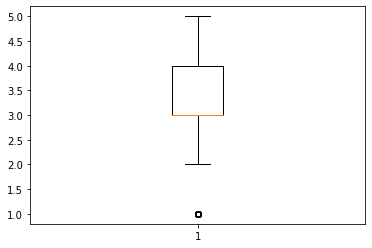

In [23]:
plt.boxplot(data2['previous_year_rating'])
plt.show()

In [24]:
#There is outlier in column previous_year_rating 
q1=data2['previous_year_rating'].quantile(.25)
q3=data2['previous_year_rating'].quantile(.75)
iqr = q3-q1
ul = q3+ 1.5 * iqr
ll = q1- 1.5 * iqr
data2['previous_year_rating'][data2['previous_year_rating']>ul] = ul
data2['previous_year_rating'][data2['previous_year_rating']<ll] = ll

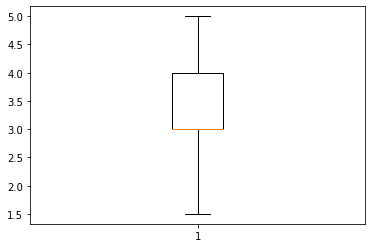

In [25]:
plt.boxplot(data2['previous_year_rating'])
plt.show()

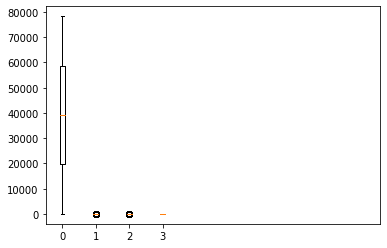

In [26]:
fig = plt.figure()
ax = plt.subplot(111)
i=0
for x in int_cols:
    ax.boxplot(data2[x], positions = [i])
    i+=1
ax.set_xlim(-0.5, 9.5)
plt.show()

In [27]:
for x in int_cols:
    q1=data2[x].quantile(.25)
    q3=data2[x].quantile(.75)
    iqr = q3-q1
    ul = q3+ 1.5 * iqr
    ll = q1- 1.5 * iqr
    data2[x][data2[x]>ul] = ul
    data2[x][data2[x]<ll] = ll

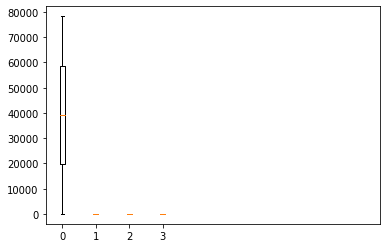

In [28]:
fig = plt.figure()
ax = plt.subplot(111)
i=0
for x in int_cols:
    ax.boxplot(data2[x], positions = [i])
    i+=1
ax.set_xlim(-0.5, 9.5)
plt.show()

In [29]:
data2['is_promoted'].unique()

array([ 0.,  1., nan])

### The dataset is splitted into test and train sets for modelling

In [31]:
train = data2[data2.type_Train==1]
test = data2[data2.type_Test==1]

In [32]:
train = train.drop(['type_Test','type_Train'],axis=1)

In [33]:
test = test.drop(['type_Test','type_Train'],axis=1)

In [34]:
y=train['is_promoted']
X=train.drop('is_promoted',axis=1)

In [35]:
import numpy as np
labels = np.unique(y)
print(labels)

[0. 1.]


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [37]:
#The target column is imbalanced,so SMOTE technique is applied here!!
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [38]:
#importing gridsearchcv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [40]:
n_estimators= [100]
criterion=['gini']
max_depth=[3,5,10]
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth}

In [41]:
RFR_cls = GridSearchCV(classifier, parameters)
RFR_cls.fit(X_res,y_res)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 10],
                         'n_estimators': [100]})

In [42]:
#Best parameters for retraining
RFR_cls.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}

In [43]:
classifier = RandomForestClassifier(criterion = 'gini',max_depth = 10 , n_estimators = 100)
classifier.fit(X_res,y_res)

RandomForestClassifier(max_depth=10)

In [44]:
ypred = classifier.predict(X_test)
ypred

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred)

array([[16379,   234],
       [ 1032,   442]])

In [53]:
#Accuracy calculation
accu = (16379+442)/(16379+442+1032+234)*100
accu

93.00049759495771

In [47]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,ypred)*100
print("Accuracy = ",accuracy)

Accuracy =  93.00049759495771


In [52]:
from sklearn.metrics import f1_score
f1score = f1_score(ypred,y_test)*100
print("f1_score =",f1score)

f1_score = 41.116279069767444


In [51]:
Res = pd.DataFrame(columns=['Actual values','is_promoted'])
Res['Actual values']=y_test
Res['is_promoted']=ypred
Res=Res.reset_index()
Res.head()

,index,Actual values,is_promoted
0,40907,0.0,0.0
1,51939,0.0,0.0
2,6978,0.0,0.0
3,12814,0.0,0.0
4,22921,0.0,0.0
